<a href="https://colab.research.google.com/github/alexeiveselov92/other_projects/blob/master/%D0%92%D1%8B%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%BD%D1%8B%D1%85%20%D0%B4%D1%80%D0%B0%D0%B9%D0%B2%D0%B5%D1%80%D0%BE%D0%B2%20%D1%80%D0%BE%D1%81%D1%82%D0%B0%20%D0%B2%D1%8B%D1%80%D1%83%D1%87%D0%BA%D0%B8%20%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Описание проблемы
Ваш клиент компания “Natural Grocery” – сеть продуктовых магазинов, основным
отличием которых является широкий ассортимент натуральных продуктов.
“Natural Grocery” показывает бурный рост выручки, и ее основной приоритет на
ближайшие два года – это быстрое масштабирование бизнеса. В частности, для
компании важно выбирать перспективное местоположение под открытие магазина
за максимально короткий срок.

Для того, чтобы обеспечить высокий темп расширения сети директор по развитию
“Natural Grocery” обратился за помощью в компанию ЦПИ, и Вам как аналитику
поручено вести данный проект.

По итогам предварительной встречи с Клиентом были сформулированы два
ключевых направления работ: выявление основных драйверов выручки магазинов
и построение прогнозной модели для принятия решений о выборе мест под
открытие новых магазинов “Natural Grocery”. Для этих целей, директор по
развитию выслал Вам внутренние данные компании о 200+ магазинах.

## Задание
1. Сформулировать и проверить 3-5 гипотез относительно факторов,
влияющих на выручку.
2. Построить упрощенную модель, прогнозирующую показатель
“daily_revenue”.
3. Составить список дополнительных данных, необходимых для дальнейшего
анализа.
4. Подготовить презентацию (3-5 слайдов) с описанием результатов.
5. Дополнительным плюсом будет реализованный код на Python в формате
.ipynb (иные языки программирования не рассматриваются).

## Описание данных
> * **`shop_id`** -	Идентификатор магазина
* **`format`** -	Формат магазина
* **`type`** -	Тип расположения магазина
* **`city_type`** -	Тип населенного пункта
* **`Open_Days`** -	Количество дней с момента открытия магазина
* **`sku_amount`** -	Количество уникальных товарных позиций в магазине, шт.
* **`trade_area`** -	Площадь торгового зала, м2
* **`open_time`** -	Время открытия магазина, час.
* **`close_time`** -	Время закрытия магазина, час.
* **`junction_distance`** -	Расстояние до ближайшего перекрестка, м
* **`people_R800`** -	Численность населения в радиусе 800м, чел.
* **`ped_traffic`** -	Оценка пешеходного потока, у.е.
* **`metro_traffic`** -	Пассажиропоток ближайшей станции метро, чел./день
* **`metro_time`** -	Время пути от ближайшей станции метро до магазина, мин
* **`income_R600`** -	Оценка среднего дохода семьи в радиусе 600м, руб.
* **`supermarkets_R500`** -	Количество супермаркетов радиусе 500м
* **`special_R500`** -	Количество специализированных продуктовых магазинов (молочные/овощные/мясные лавки и т.д.) в радиусе 500м
* **`hypermarkets_R500`** -	Количество гипермаркетов в радиусе 500м
* **`others_R500`** -	Количество прочих продуктовых магазинов в радиусе 500м
* **`self_R800`** -	Количество магазинов собственной сети в радиусе 500м
* **`revenue_weekday_share`** -	Доля выручки в будние дни в общей недельной выручке
* **`revenue_per_bill`** -	Средний чек магазина, $
* **`daily_revenue`** -	Среднедневная выручка магазина (целевой показатель), \$

## Загрузка библиотек

In [0]:
import pandas as pd
import math as mth
from scipy import stats as st
import random
import numpy as np

#визуализация
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px

#другое
pd.options.display.expand_frame_repr = False
import warnings
warnings.filterwarnings('ignore')

#загрузка файлов с диска
from google.colab import drive
drive.mount('/content/drive')

#ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Загрузка данных и предобработка

In [0]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/datasets/geointellect_data.xlsx', index_col=None, sheet_name='data')
df.columns = df.columns.str.lower()
df.info()
print('\nДубликатов в выгрузке: {}\n'.format(df.duplicated().sum()))
print('Пропуски в данных:')
print((df.isnull().sum()/len(df)).map(lambda x: '{:.2%}'.format(x)).sort_values(ascending = False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   shop_id                226 non-null    int64  
 1   format                 226 non-null    object 
 2   type                   226 non-null    object 
 3   city_type              226 non-null    object 
 4   open_days              226 non-null    int64  
 5   sku_amount             226 non-null    int64  
 6   trade_area             226 non-null    float64
 7   open_time              226 non-null    int64  
 8   close_time             226 non-null    int64  
 9   junction_distance      226 non-null    int64  
 10  people_r800            226 non-null    int64  
 11  ped_traffic            226 non-null    int64  
 12  metro_traffic          137 non-null    float64
 13  metro_time             135 non-null    float64
 14  income_r600            137 non-null    float64
 15  superm

> Видим, что дублей в данных нет, но есть пропуски в 3 столбцах - 2 связанных с метро и 1 с доходом семьи. Касаемо метро причина понятна - возможно метро от данных магазинов находится далеко. Касаемо дохода семьи - причину отсутствия значений мы не знаем.

### Проверим, в каких магазинах присутствуют пропуски в данных

In [0]:
df_witn_nan = df.query('income_r600.isnull() or metro_time.isnull() or metro_traffic.isnull()', engine='python')
for column in ['metro_traffic', 'metro_time', 'income_r600']:
  print('df with nans, without nans column: {}'.format(column))
  print(df_witn_nan[~(df_witn_nan[column].isnull())][['metro_traffic', 'metro_time', 'income_r600']], '\n')
df_witn_nan['city_type'].value_counts()

df with nans, without nans column: metro_traffic
     metro_traffic  metro_time  income_r600
72         62200.0         NaN       2814.7
132        31300.0         NaN       2213.0 

df with nans, without nans column: metro_time
Empty DataFrame
Columns: [metro_traffic, metro_time, income_r600]
Index: [] 

df with nans, without nans column: income_r600
     metro_traffic  metro_time  income_r600
72         62200.0         NaN       2814.7
132        31300.0         NaN       2213.0 



Rural    89
Urban     2
Name: city_type, dtype: int64

> Мы выяснили, что пропуски в столбцах `metro_traffic, metro_time, income_r600` содержатся во всех сельских населенных пунктах. 

> В двух городских населенных пунктах присутствуют пропуски в столбце `metro_time`, возможно это обусловлено тем, что до метро очень долго добираться пешком.

## Исследовательский анализ данных

### Посмотрим категориальные переменные

In [0]:
grouped_by_categorial_columns = (df.groupby(['city_type', 'type', 'format']).agg({'shop_id':'count'})).reset_index()#.apply(lambda x: '{:.2%}'.format(x['shop_id']), axis=1).reset_index()
grouped_by_categorial_columns = grouped_by_categorial_columns.rename(columns = {'shop_id':'shops'})
grouped_by_categorial_columns['percent_of_all_shops'] = (grouped_by_categorial_columns['shops'] / len(df)).map(lambda x: '{:.2%}'.format(x))
print('Кол-во магазинов в зависимости от населенного пункта, типа и формата магазина')
print(grouped_by_categorial_columns)
fig = px.bar(grouped_by_categorial_columns, x='type', y='shops', color='format', 
             barmode='group', facet_col='city_type', text = 'shops')
fig.update_layout(
    title='Кол-во магазинов в зависимости от населенного пункта, типа и формата магазина')
fig.update_traces(textposition='outside')
# for trace in fig.data:
#     trace.name = 'Формат магазина - ' + trace.name.split('=')[1] 
fig.show()

Кол-во магазинов в зависимости от населенного пункта, типа и формата магазина
  city_type         type format  shops percent_of_all_shops
0     Rural  residential   mini     23               10.18%
1     Rural  residential  usual     11                4.87%
2     Rural      traffic   mini     41               18.14%
3     Rural      traffic  usual     14                6.19%
4     Urban  residential   mini      9                3.98%
5     Urban  residential  usual     10                4.42%
6     Urban      traffic   mini     46               20.35%
7     Urban      traffic  usual     72               31.86%


> Очевидно, что в 8 категориях магазинов, зависящих от типа населенного пункта, типа и формата магазина, будут отличаться некоторые показатели. Далее при построении прогнозной модели выручки мы будем идентифицировать каждую из 8 групп с помощью бинарных признаков.

> Так же можно сделать выводы:
* В сельских населенных пунктах как в спальных районах, так и в районах с повышенным трафиком больше магазинов меньшего формата.
* В городах же в спальных районах количество магазинов обоих форматов практически одинаковое, тогда как в районах повышенного трафика больше магазинов обычного формата. 

### Посмотрим средние значения признаков по категориям магазинов

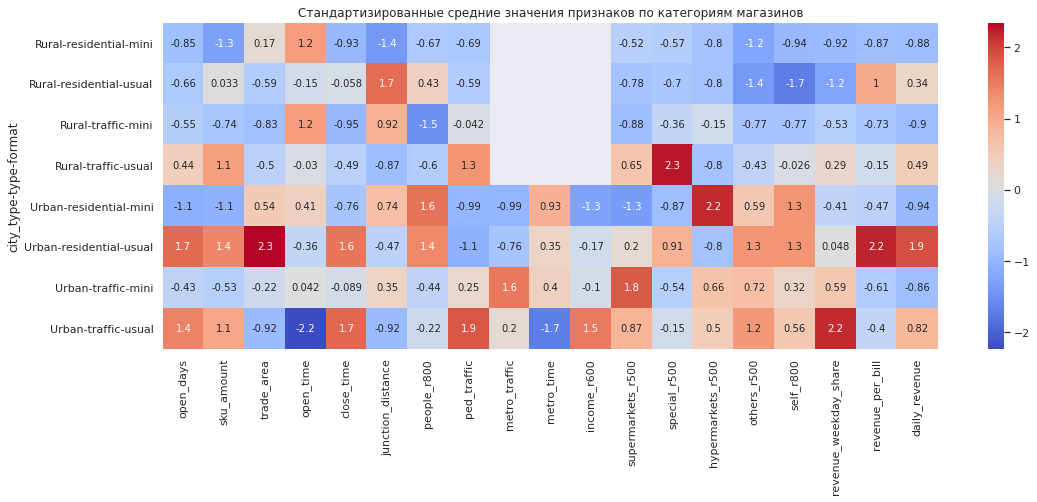

,city_type,type,format,open_days,sku_amount,trade_area,open_time,close_time,junction_distance,people_r800,ped_traffic,metro_traffic,metro_time,income_r600,supermarkets_r500,special_r500,hypermarkets_r500,others_r500,self_r800,revenue_weekday_share,revenue_per_bill,daily_revenue
0,Rural,residential,mini,566.217391,2243.565217,107.795652,8.826087,21.956522,34.347826,32817.260870,40543.130435,NaN,NaN,NaN,5.478261,6.478261,0.000000,0.739130,0.391304,0.666009,7.897826,3651.756522
1,Rural,residential,usual,587.000000,2273.000000,97.918182,8.545455,22.181818,47.545455,39418.272727,42498.909091,NaN,NaN,NaN,5.363636,6.272727,0.000000,0.181818,0.181818,0.661752,9.342727,5481.029091
2,Rural,traffic,mini,599.219512,2255.804878,94.741463,8.829268,21.951220,44.341463,27802.170732,53565.073171,NaN,NaN,NaN,5.317073,6.804878,0.048780,2.512195,0.439024,0.671406,8.008049,3621.887805
3,Rural,traffic,usual,709.142857,2297.285714,99.078571,8.571429,22.071429,36.571429,33260.928571,79699.142857,NaN,NaN,NaN,6.000000,10.928571,0.000000,3.857143,0.642857,0.682797,8.450000,5715.600714
4,Urban,residential,mini,540.333333,2248.666667,112.655556,8.666667,22.000000,43.555556,46583.555556,34560.666667,54811.111111,21.333333,1978.214444,5.111111,6.000000,0.222222,7.888889,1.000000,0.673061,8.201111,3560.033333
5,Urban,residential,usual,849.100000,2303.700000,136.460000,8.500000,22.600000,38.300000,45208.100000,33270.800000,55840.000000,19.200000,2146.341000,5.800000,8.800000,0.000000,10.500000,1.000000,0.679444,10.254000,7880.205000
6,Urban,traffic,mini,612.608696,2260.413043,102.745652,8.586957,22.173913,41.891304,34190.782609,59528.260870,66121.739130,19.391304,2156.032609,6.521739,6.521739,0.108696,8.391304,0.739130,0.686940,8.094783,3680.030652
7,Urban,traffic,usual,821.541667,2295.638889,93.551389,8.097222,22.638889,36.347222,35524.125000,91679.819444,60086.111111,11.700000,2406.882083,6.097222,7.125000,0.097222,10.361111,0.805556,0.708867,8.259861,6214.348472


In [0]:
description = df.groupby(['city_type', 'type', 'format']).mean().reset_index()
# description['city_type'] = description['city_type'] + ' - ' + description['type'] + ' - ' +  description['format']
# description = description.drop(['type', 'format'], axis = 1)
scaler = StandardScaler()
description_st = scaler.fit_transform(description.drop(['city_type', 'type', 'format'], axis = 1))
description_st = pd.DataFrame(description_st)
for column in ['city_type', 'type', 'format']:
  description_st[column] = description[column]

description_st = description_st.set_index(['city_type', 'type', 'format'])
description_st.columns = description.drop(['city_type', 'type', 'format'], axis = 1).columns
description_st = description_st.drop(['shop_id'],axis=1)

plt.figure(figsize=(18,6))
plt.title('Стандартизированные средние значения признаков по категориям магазинов')
sns.heatmap(description_st, annot = True, cmap = 'coolwarm', square=True)
plt.show()
description.drop(['shop_id'],axis=1)

> Мы вывели стандартизированные средние значения признаков и целевой переменной и создали тепловую карту.

Мы видим, что дневаня выручка выше в магазинах обычного формата, независимо от города и расположения магазина.


### Посмотрим на распределение признаков

In [0]:
plt.figure()
sns.pairplot(df)
plt.title('Матрица распределений')
plt.show()

### Построим матрицу корреляций

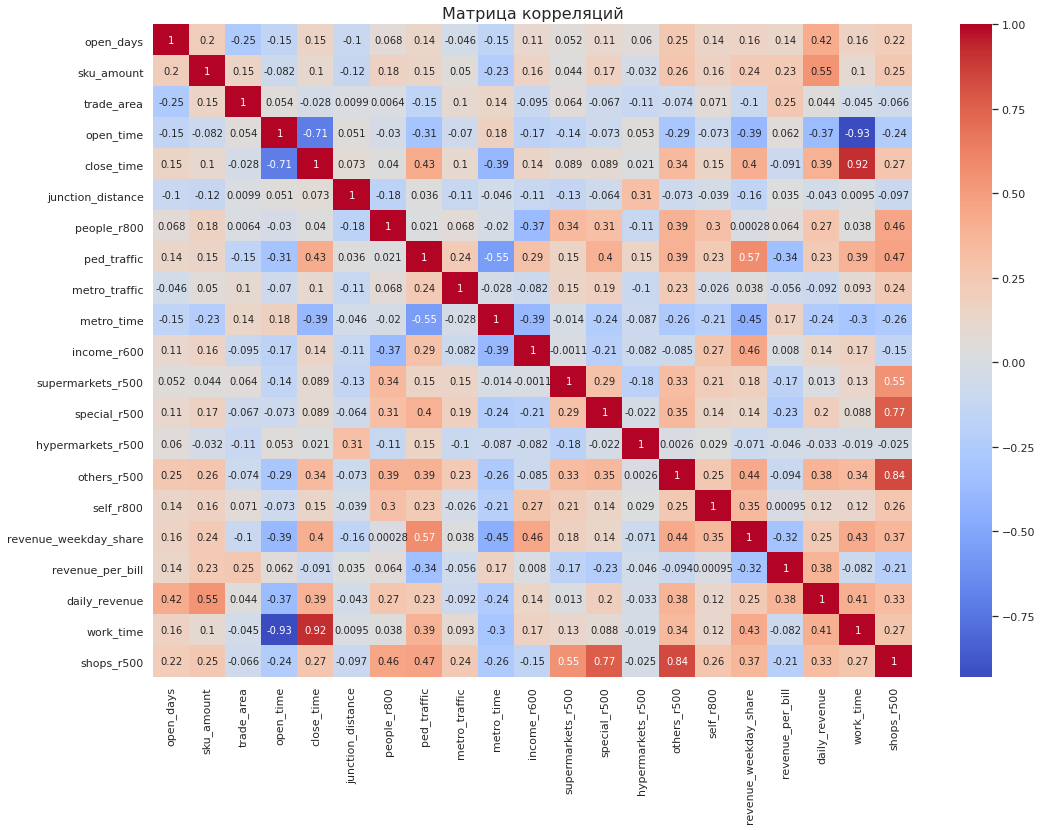

In [0]:
df['work_time'] = df['close_time'] - df['open_time']
df['shops_r500'] = df['supermarkets_r500'] + df['others_r500'] + df['special_r500'] + df['hypermarkets_r500']
plt.figure(figsize=(17,12))
plt.title('Матрица корреляций', fontsize=16)
sns.heatmap(df.drop(['shop_id'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

### Построим прогнозную модель


In [0]:
# создаем бинарные признаки из категориальных переменных
df_with_dummies = pd.get_dummies(df, columns=['format', 'type', 'city_type'])

# задаем списки для дальнейшего создания датафрейма по ним
models_list = []
r2_list = []
mae_list = []
sample_names = []
features_set_names = []

#напишем функцию, которая будет применять несколько моеделей одновременно
def create_predictive_models(X_selected, y_selected, features_set_name, n_features):
  # задаём признаки и целевую переменную
  X = X_selected
  y = y_selected

  # стандартизируем признаки и нарезаем данные на тренировочную и тестовые выборки
  X_st = scaler.fit_transform(X)
  X_st =  SelectKBest(f_regression,  k= n_features).fit_transform(X_st, y)
  X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size=0.4, random_state=0)
  X_test_1, X_test_2, y_test_1, y_test_2 = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

  # задаём списки для нашего цикла перебора моделей
  models = {'LinearRegression':LinearRegression(), 'Ridge':Ridge(), 'Lasso':Lasso(), 'RandomForestRegressor':RandomForestRegressor()}
  samples_x_test = [X_test_1, X_test_2, X_test]
  samples_y_test = [y_test_1, y_test_2, y_test]
  samples_test_names = ['test_1', 'test_2', 'test_3']

  # напишем цикл, использующий все модели по-очереди
  for select_model in models:
    model = models[select_model]
    model.fit(X_train, y_train)
    for sample_x_test, sample_y_test, samples_test_name in zip(samples_x_test, samples_y_test, samples_test_names):
      predictions = model.predict(sample_x_test)
      r2 = r2_score(sample_y_test, predictions)
      mae = mean_absolute_error(sample_y_test, predictions)
      models_list.append(select_model)
      r2_list.append(r2)
      mae_list.append(mae)
      sample_names.append(samples_test_name)
      features_set_names.append(features_set_name)

# зададим несколько наборов признаков для выявления лучшего набора
X_1 = df_with_dummies[['open_days','work_time','sku_amount','trade_area','people_r800',
       'revenue_per_bill', 'junction_distance', 'others_r500',
       'format_mini', 'format_usual', 'type_residential', 
       'type_traffic', 'city_type_Rural', 'city_type_Urban', 
       'self_r800', 'ped_traffic', 'revenue_weekday_share']]
y_1 = df_with_dummies['daily_revenue']

X_2 = df_with_dummies[['open_days','work_time','sku_amount','trade_area','people_r800',
       'revenue_per_bill', 'junction_distance', 'shops_r500', 
       'format_mini',	'format_usual',	'type_residential',	
       'type_traffic',	'city_type_Rural',	'city_type_Urban']]
y_2 = df_with_dummies['daily_revenue']

# запускаем нашу функцию
create_predictive_models(X_1, y_1, 'set_1', 10)
create_predictive_models(X_2, y_2, 'set_2', 10)

# смотрим результаты наших моделей
results = pd.DataFrame({'model':models_list, 'r2':r2_list, 'mae':mae_list, 'test':sample_names, 'features_set':features_set_names})
results.groupby(['features_set', 'model']).agg({'r2':'mean', 'mae':'mean'}).sort_values(by='r2', ascending = False).reset_index()

,features_set,model,r2,mae
0,set_1,Ridge,0.728442,630.012790
1,set_1,LinearRegression,0.728106,630.997179
2,set_1,Lasso,0.728002,631.122538
3,set_2,Ridge,0.724182,630.195230
4,set_2,Lasso,0.723822,630.882905
5,set_2,LinearRegression,0.723754,631.093120
6,set_1,RandomForestRegressor,0.710020,623.848120
7,set_2,RandomForestRegressor,0.695376,647.333392


> * Как мы видим, лучшие результаты дает набор признаков №1 и регрессионная модель Ridge. 
* R2 мы получили максимальный 0.728.
* Средняя ошибка модели - 630 у.е. дневной выручки, что составляет 0.37 стандартных отклонений данной величины или составляет 13% от среднего значения.

In [0]:
df['daily_revenue'].describe()

count      226.000000
mean      4868.824690
std       1673.389938
min       2274.960000
25%       3612.015000
50%       4576.245000
75%       5760.890000
max      11288.930000
Name: daily_revenue, dtype: float64

### Выберем лучшую модель и разберем её
Посмотрим коэффициенты нашей лучшей модели и её лучшие признаки

In [0]:
X = X_1
y = y_1

X_st = scaler.fit_transform(X)
X_new = SelectKBest(f_regression,  k=10).fit_transform(X_st, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4, random_state=0)

model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
columns_bool = pd.DataFrame({'column':X.columns, 'bool':SelectKBest(f_regression,  k=10).fit(X_st, y).get_support()})
columns_bool = columns_bool[columns_bool['bool']==True]
columns_bool['coef'] = model.coef_
columns_bool['coef_abs'] = columns_bool['coef'].apply(lambda x: abs(x))
columns_bool.sort_values(by='coef_abs', ascending = False)

,column,bool,coef,coef_abs
9,format_usual,True,431.769085,431.769085
8,format_mini,True,-431.769085,431.769085
5,revenue_per_bill,True,390.854710,390.854710
1,work_time,True,344.036249,344.036249
2,sku_amount,True,297.822742,297.822742
4,people_r800,True,174.799215,174.799215
0,open_days,True,115.560674,115.560674
7,others_r500,True,104.597792,104.597792
13,city_type_Urban,True,-46.273834,46.273834
12,city_type_Rural,True,46.273834,46.273834


 **Как мы видим, самые важные прогнозные признаки в нашей модели идут в следующем порядке:**
>* формат магазина
* средний чек 
* кол-во рабочих часов в день
* кол-во товарных позиций
* численность населения в радиусе 800 метров
* сколько времени прошло со дня открытия магазина
* количество прочих продуктовых магазинов в радиусе 500 метров
* тип населенного пункта

### Проверим гипотезы
1. Дневная выручка магазина отличается в зависимости от формата магазина.
  * Нашей нулевой гипотезой будет гипотеза о равенстве дневной выручки в обоих случаях. Критический уровень значимости возьмем 0.05.
2. Дневная выручка магазина отличается в зависимости от типа населенного пункта.
  * Нашей нулевой гипотезой будет гипотеза о равенстве дневной выручки в обоих случаях. Критический уровень значимости возьмем 0.05.
3. Дневная выручка магазина отличается в зависимости от расположения. Критический уровень значимости возьмем 0.05.
  * Нашей нулевой гипотезой будет гипотеза о равенстве дневной выручки в обоих случаях. Критический уровень значимости возьмем 0.05.

Различия дневной выручки по магазинам разных форматов:
        daily_revenue
format               
mini      3645.458067
usual     6229.391308 



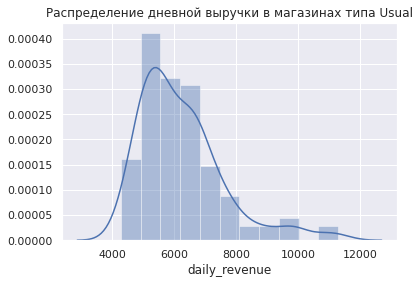

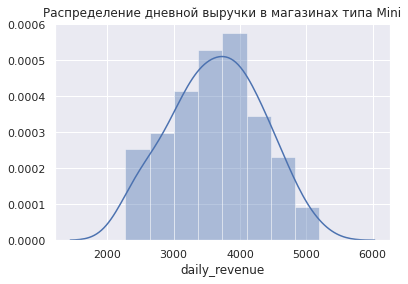

Проверка нулевой гипотезы о равенстве дневной выручки в обоих форматах магазинов:
P-value: 4.222886357318026e-46
Отвергаем нулевую гипотезу


In [0]:
print('Различия дневной выручки по магазинам разных форматов:')
print(df.groupby('format').agg({'daily_revenue':'mean'}),'\n')
usual_shop = df[df['format']=='usual']
mini_shop = df[df['format']=='mini']
plt.title('Распределение дневной выручки в магазинах типа Usual')
sns.distplot(usual_shop['daily_revenue'])
plt.show()
plt.title('Распределение дневной выручки в магазинах типа Mini')
sns.distplot(mini_shop['daily_revenue'])
plt.show()

print('Проверка нулевой гипотезы о равенстве дневной выручки в обоих форматах магазинов:')
results = st.ttest_ind(usual_shop['daily_revenue'], mini_shop['daily_revenue'])
print('P-value: {}'.format(results.pvalue))
alpha = 0.05
if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Нет оснований отвергать нулевую гипотезу')

Различия дневной выручки по магазинам в разных населенных пунктах:
           daily_revenue
city_type               
Rural        4188.736292
Urban        5310.633942 



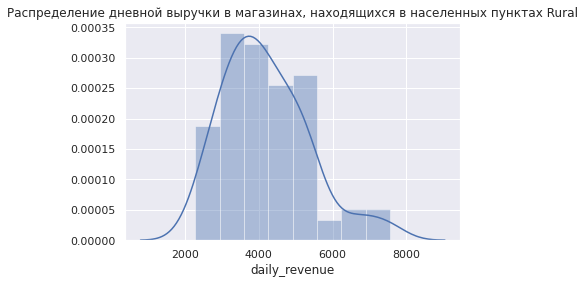

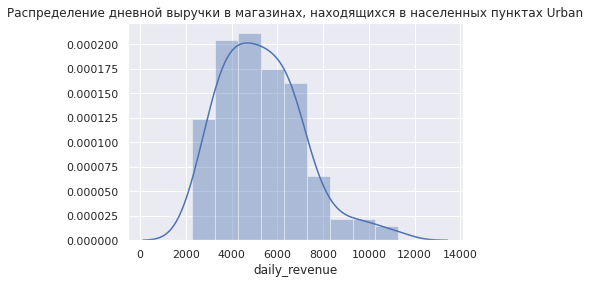

Проверка нулевой гипотезы о равенстве дневной выручки в магазинах в разных типах населенных пунктов:
P-value: 4.4497785804007415e-07
Отвергаем нулевую гипотезу


In [0]:
print('Различия дневной выручки по магазинам в разных населенных пунктах:')
print(df.groupby('city_type').agg({'daily_revenue':'mean'}),'\n')
rural_shop = df[df['city_type']=='Rural']
urban_shop = df[df['city_type']=='Urban']
plt.title('Распределение дневной выручки в магазинах, находящихся в населенных пунктах Rural')
sns.distplot(rural_shop['daily_revenue'])
plt.show()
plt.title('Распределение дневной выручки в магазинах, находящихся в населенных пунктах Urban')
sns.distplot(urban_shop['daily_revenue'])
plt.show()

print('Проверка нулевой гипотезы о равенстве дневной выручки в магазинах в разных типах населенных пунктов:')
results = st.ttest_ind(rural_shop['daily_revenue'], urban_shop['daily_revenue'])
print('P-value: {}'.format(results.pvalue))
alpha = 0.05
if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Нет оснований отвергать нулевую гипотезу')

Различия дневной выручки по магазинам в разных районах:
             daily_revenue
type                      
residential    4813.661698
traffic        4885.724335 



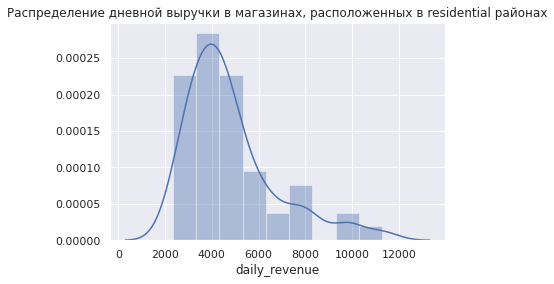

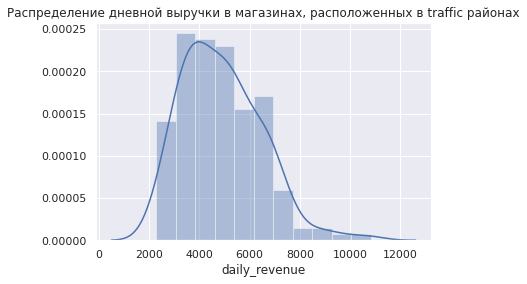

Проверка нулевой гипотезы о равенстве дневной выручки в магазинах в разных районах:
P-value: 0.7845430298503967
Нет оснований отвергать нулевую гипотезу


In [0]:
print('Различия дневной выручки по магазинам в разных районах:')
print(df.groupby('type').agg({'daily_revenue':'mean'}),'\n')
residential_shop = df[df['type']=='residential']
traffic_shop = df[df['type']=='traffic']
plt.title('Распределение дневной выручки в магазинах, расположенных в residential районах')
sns.distplot(residential_shop['daily_revenue'])
plt.show()
plt.title('Распределение дневной выручки в магазинах, расположенных в traffic районах')
sns.distplot(traffic_shop['daily_revenue'])
plt.show()

print('Проверка нулевой гипотезы о равенстве дневной выручки в магазинах в разных районах:')
results = st.ttest_ind(residential_shop['daily_revenue'], traffic_shop['daily_revenue'])
print('P-value: {}'.format(results.pvalue))
alpha = 0.05
if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Нет оснований отвергать нулевую гипотезу')

* **Гипотеза 1 - Дневная выручка магазина отличается в зависимости от формата магазина**
  * Вероятность получить такие или еще большие отличия дневной выручки в обоих форматах магазинов случайным образом практически нулевая. 
  * Это означает, что в магазинах разных форматов различие дневной выручки статистически значимо и в среднем в магазинах обычного формата выручка практически выше в два раза, чем в мини-формате.
* **Гипотеза 2 - Дневная выручка магазина отличается в зависимости от типа населенного пункта**
  * Вероятность получить такие или еще большие отличия дневной выручки в обоих типах населенных пунктов случайным образом практически нулевая. 
  * Это означает, что разница в 1200 у.е. между магазинами в двух типах населенных пунктов статистически значима.
* **Гипотеза 3 - Дневная выручка магазина отличается в зависимости от расположения**
  * Вероятность получить такие или еще большие отличия дневной выручки в обоих типах населенных пунктов случайным образом равняется 0.78. 
  * Это означает, что нет оснований считать выручку в районах residential и  traffic разной.

## Выводы
В ходе работы над проектом мы выявили, что у нас отсутствуют значения некоторых признаков для магазинов, расположенных в населенных пунктах типа Rural. В виду того, что данные признаки не имели серьезной предсказательной силы, мы их не учитывали в нашей прогнозной модели, прогнозирующей дневную выручку.

По имеющимся данным мы разделили наши магазины на 8 категорий в зависимости от города, района и формата магазина и вывели средние значения признаков по каждой из категорий магазинов. Отсюда мы узнали, что именно в магазинах обычного формата мы имеем наибольшую дневную выручку. Так же мы выявили наиболее перспективную категорию магазинов - магазины в городах в спальных районах обычного формата.

В ходе создания прогнозной модели мы выявили признаки, которые имеют наибольшую предсказательную силу и их в нашей модели в итоге используется всего 8.

### Признаки, используемые в прогнозной модели в порядке убывания важности:
1. Формат магазина
2. Средний чек магазина
3. Суммарное количество часов работы магазина в день
4. Количество уникальных товарных позиций в магазине
5. Численность населения в радиусе 800м, чел
6. Количество дней с момента открытия магазина
7. Количество прочих продуктовых магазинов в радиусе 500м
8. Тип населенного пункта

### Результаты работы нашей модели: 
* Наша модель прогнозирует дневную выручку магазина со средней ошибкой в 630 у.е., что составляет 0.37 стандартных отклонений данной величины или составляет 13.7% от медианной дневной выручки - 4576 у.е. 

### В ходе работы мы проверили 3 гипотезы. Выводы по ним: 
* Гипотеза 1 - Дневная выручка магазина отличается в зависимости от формата магазина
  * Вероятность получить такие или еще большие отличия дневной выручки в обоих форматах магазинов случайным образом практически нулевая. 
  * Это означает, что **в магазинах разных форматов различие дневной выручки статистически значимо** и в среднем в магазинах обычного формата выручка практически выше в два раза, чем в мини-формате.
* Гипотеза 2 - Дневная выручка магазина отличается в зависимости от типа населенного пункта
  * Вероятность получить такие или еще большие отличия дневной выручки в обоих типах населенных пунктов случайным образом практически нулевая. 
  * Это означает, что **разница в 1200 у.е. между магазинами в двух типах населенных пунктов статистически значима**.
* Гипотеза 3 - Дневная выручка магазина отличается в зависимости от расположения
  * Вероятность получить такие или еще большие отличия дневной выручки в обоих типах населенных пунктов случайным образом равняется 0.78. 
  * Это означает, что **нет оснований считать выручку в районах residential и  traffic разной**.

### Список дополнительных данных, необходимых для дальнейшего анализа: 
* Было бы хорошо получить геоданные наших магазинов, тогда была бы возможность выявить наиболее перспективные районы для открытия новых точек.
* Так как для нас интереснее всего открытие магазинов в городах в спальных районах, то мы могли бы по данным из интернета искать районы с большей плотностью застройки и наибольшим количеством магазинов - при этом мы знаем что дневная выручка положительно коррелирует с количеством других магазинов и супермаркетов, находящихся в ближайшем радиусе. С количеством гипермаркетов имеем отрицательную корреляцию. 


## Презентация по проекту
Ссылка на нашу презентацию в Google-презентации:

https://docs.google.com/presentation/d/1o5ECJxGlYu4-zxI8-V9XgsKxNBTO1HpLtszx53NnJ-A/edit?usp=sharing